In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import make_classification
import xgboost as xgb

# Load dataset
data = pd.read_csv('/content/ECU_IoHT.csv')

data.head(5)

,No.,Time,Source,Destination,Protocol,Length,Info,Type,Type of attack
0,1,0.000000,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing
1,2,0.002956,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing
2,3,0.200725,Alfa_97:cf:63,Broadcast,ARP,42,Who has 192.168.43.1? Tell 192.168.43.186,Attack,ARP Spoofing
3,4,0.202713,192.168.43.186,192.168.43.1,DNS,85,Standard query 0x0c44 PTR 1.43.168.192.in-addr...,Normal,No Attack
4,5,0.411565,6e:c7:ec:3c:f2:ba,Alfa_97:cf:63,ARP,42,192.168.43.1 is at 6e:c7:ec:3c:f2:ba,Attack,ARP Spoofing


In [2]:
data.shape

(111207, 9)

In [3]:
data.dropna(inplace=True)

In [4]:
data.shape

(111207, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111207 entries, 0 to 111206
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   No.             111207 non-null  int64  
 1   Time            111207 non-null  float64
 2   Source          111207 non-null  object 
 3   Destination     111207 non-null  object 
 4   Protocol        111207 non-null  object 
 5   Length          111207 non-null  int64  
 6   Info            111207 non-null  object 
 7   Type            111207 non-null  object 
 8   Type of attack  111207 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 7.6+ MB


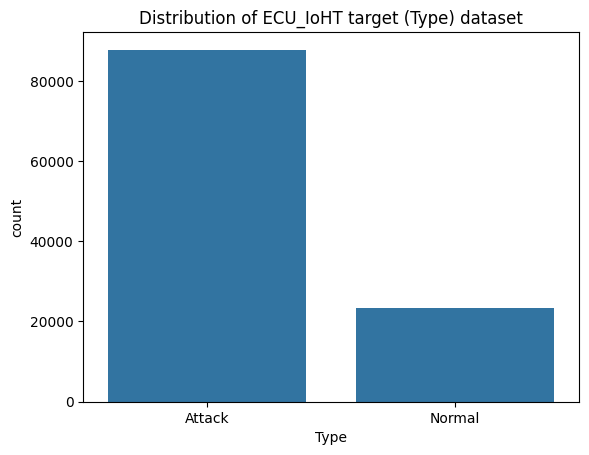

,count
Type,
Attack,87754
Normal,23453


In [6]:
# Visualize the distribution of the target variable
sns.countplot(x='Type', data=data)
plt.title('Distribution of ECU_IoHT target (Type) dataset')
plt.show()
data.Type.value_counts()

In [7]:
# Initialize LabelEncoder
encoder = LabelEncoder()

# Perform label encoding
data['Type'] = encoder.fit_transform(data['Type'])
data['Protocol'] = encoder.fit_transform(data['Protocol'])
data['Info'] = encoder.fit_transform(data['Info'])


In [8]:
# Split features and labels
X = data.drop(['Type', 'Type of attack', 'Source', 'Destination'], axis=1)
y = data['Type']

In [9]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
#use SMOTE to mitigate data imbalance
from imblearn.over_sampling import SMOTE
X_smote, y_smote = SMOTE().fit_resample(X, y)

Random forest classifier

In [12]:

# Train the rf model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Make predictions with the rf model
rf_pred = rf_model.predict(X_test)

Evaluation report for Random Forest

In [14]:
#decleare performance evaluation variables for rf
accuracy_rf = accuracy_score(y_test, rf_pred)
precision_rf = precision_score(y_test, rf_pred)
recall_rf = recall_score(y_test, rf_pred)
f1_rf = f1_score(y_test, rf_pred)
cm_rf = confusion_matrix(y_test, rf_pred)

In [15]:
# Classification Report for rf
print("Classification Report for random forest (ECU_IoHT):")
print(classification_report(y_test, rf_pred))



Classification Report for random forest (ECU_IoHT):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17572
           1       0.99      0.99      0.99      4670

    accuracy                           1.00     22242
   macro avg       0.99      0.99      0.99     22242
weighted avg       1.00      1.00      1.00     22242



AUC-ROC for evaluation for RF


ROC AUC Score for Random Forest (ECU_IoHT): 0.9935601143731194


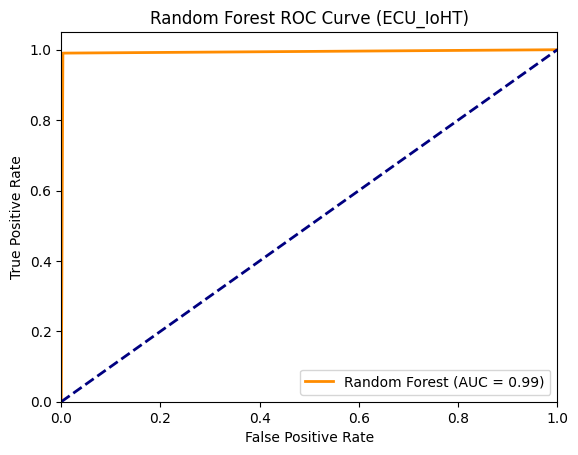

In [16]:
# print ROC AUC Score for rf
roc_auc_rf = roc_auc_score(y_test, rf_pred)
print(f"\nROC AUC Score for Random Forest (ECU_IoHT): {roc_auc_rf}")

# Plot ROC Curve for rf
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred)
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve (ECU_IoHT)')
plt.legend(loc="lower right")
plt.show()


Random Forest Classifier (ECU_IoHT):
 Accuracy: 0.9954140814674939
 Precision: 0.9878257155061939
 Recall: 0.9903640256959315
 F1 Score: 0.9890932420872541


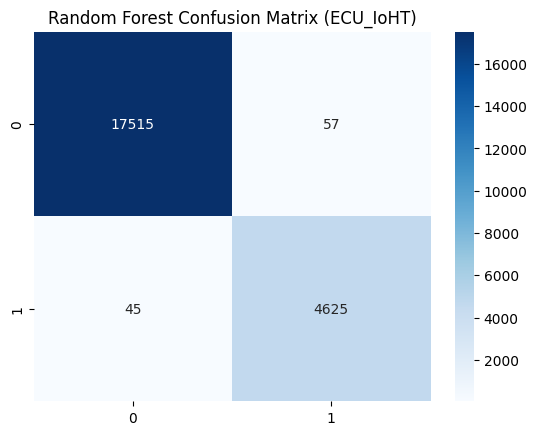

In [17]:
#print confusion matrix and performace evaluation metrics for rf
print(f'Random Forest Classifier (ECU_IoHT):\n Accuracy: {accuracy_rf}\n Precision: {precision_rf}\n Recall: {recall_rf}\n F1 Score: {f1_rf}')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix (ECU_IoHT)')
plt.show()

Extreme Gradient Boosting Classifier

In [18]:
# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(eval_metric='logloss')

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [19]:
# Make predictions on the test set
xgb_pred = xgb_model.predict(X_test)


In [20]:
#declare performance evaluation metrics for xgb
accuracy_xgb = accuracy_score(y_test, xgb_pred)
precision_xgb = precision_score(y_test, xgb_pred)
recall_xgb = recall_score(y_test, xgb_pred)
f1_xgb = f1_score(y_test, xgb_pred)
cm_xgb = confusion_matrix(y_test, xgb_pred)

In [21]:
# Classification Report for xgb
print("Classification Report for XGB (ECU_IoHT):")
print(classification_report(y_test, xgb_pred))

Classification Report for XGB (ECU_IoHT):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     17572
           1       0.97      0.98      0.98      4670

    accuracy                           0.99     22242
   macro avg       0.98      0.99      0.99     22242
weighted avg       0.99      0.99      0.99     22242




ROC AUC Score for Extreme Gradient Boosting (ECU_IoHT): 0.9871920897125123


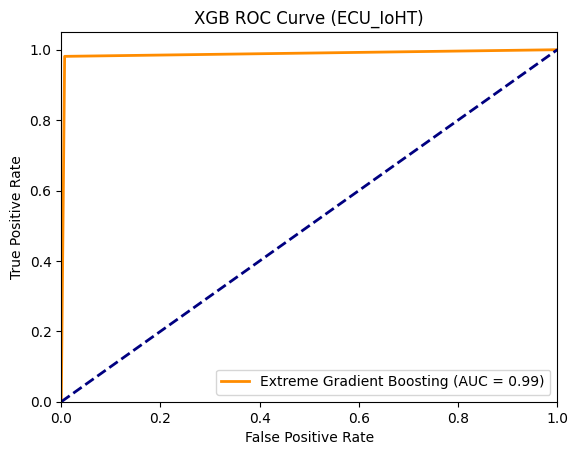

In [22]:
# print ROC AUC Score for xgb
roc_auc_xgb = roc_auc_score(y_test, xgb_pred)
print(f"\nROC AUC Score for Extreme Gradient Boosting (ECU_IoHT): {roc_auc_xgb}")

# Plot ROC Curve for xgb
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_pred)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label=f'Extreme Gradient Boosting (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB ROC Curve (ECU_IoHT)')
plt.legend(loc="lower right")
plt.show()


Extreme Gradient Boosting (ECU_IoHT):
 Accuracy: 0.9906932829781494
 Precision: 0.9746862369708572
 Recall: 0.9811563169164882
 F1 Score: 0.9779105751787428


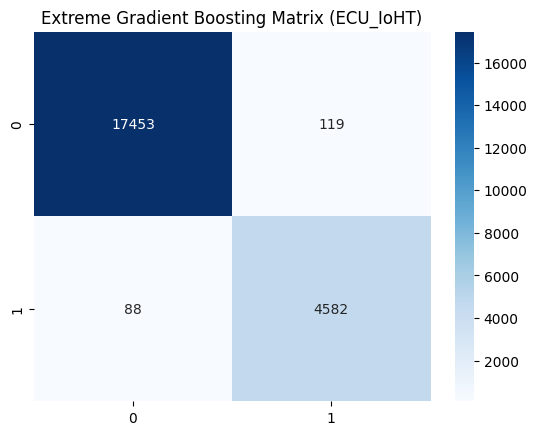

In [23]:
#print confusionmatrix and performance evaluation metrics for xgb
print(f'Extreme Gradient Boosting (ECU_IoHT):\n Accuracy: {accuracy_xgb}\n Precision: {precision_xgb}\n Recall: {recall_xgb}\n F1 Score: {f1_xgb}')
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Extreme Gradient Boosting Matrix (ECU_IoHT)')
plt.show()

Logistic Regression Classifier

In [24]:
#train the lr
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [25]:
#male predictions with the lr
lr_pred = lr_model.predict(X_test)

In [26]:
#declare performance evaluation metrics for lr
accuracy_lr = accuracy_score(y_test, lr_pred)
precision_lr = precision_score(y_test, lr_pred)
recall_lr = recall_score(y_test, lr_pred)
f1_lr = f1_score(y_test, lr_pred)
cm_lr = confusion_matrix(y_test, lr_pred)

In [27]:
# Classification Report for LR
print("Classification Report for lr (ECU_IoHT):")
print(classification_report(y_test, lr_pred))


Classification Report for lr (ECU_IoHT):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     17572
           1       0.76      0.90      0.82      4670

    accuracy                           0.92     22242
   macro avg       0.87      0.91      0.89     22242
weighted avg       0.93      0.92      0.92     22242




ROC AUC Score for Logistic Regression (ECU_IoHT): 0.9112408123494112


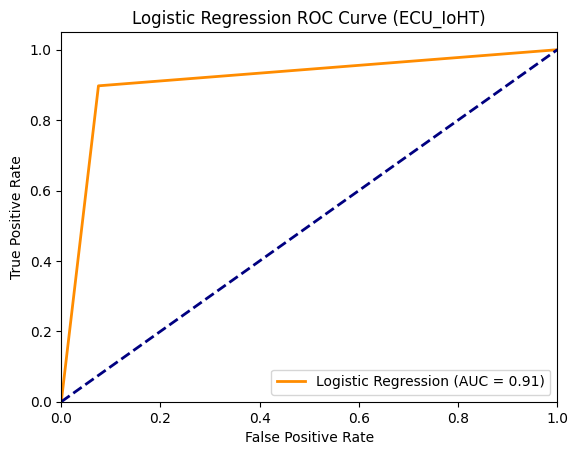

In [28]:
# print ROC AUC Score for LR
roc_auc_lr = roc_auc_score(y_test, lr_pred)
print(f"\nROC AUC Score for Logistic Regression (ECU_IoHT): {roc_auc_lr}")

# Plot ROC Curve for lr
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred)
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve (ECU_IoHT)')
plt.legend(loc="lower right")
plt.show()


Logistic Regression Classifier (ECU_IoHT):
 Accuracy: 0.9192518658394029
 Precision: 0.7608932461873639
 Recall: 0.8974304068522484
 F1 Score: 0.8235409707211633


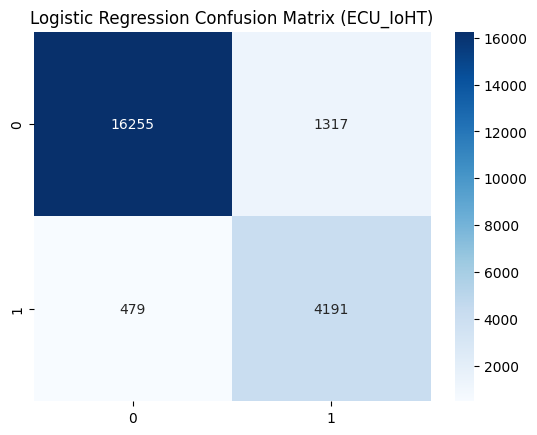

In [29]:
#print confusion matrix and performance evaluation for lr
print(f'Logistic Regression Classifier (ECU_IoHT):\n Accuracy: {accuracy_lr}\n Precision: {precision_lr}\n Recall: {recall_lr}\n F1 Score: {f1_lr}')
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix (ECU_IoHT)')
plt.show()

Support Vector Machine Classifier

In [30]:
# train the vm
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [31]:
#make prediction with svm
svm_pred = svm_model.predict(X_test)

In [32]:
# declare performance evaluation metrics for svm
accuracy_svm = accuracy_score(y_test, svm_pred)
precision_svm = precision_score(y_test, svm_pred)
recall_svm = recall_score(y_test, svm_pred)
f1_svm = f1_score(y_test, svm_pred)
cm_svm = confusion_matrix(y_test, svm_pred)

In [33]:
# Classification Report for svm
print("Classification Report for svm (ECU_IoHT):")
print(classification_report(y_test, svm_pred))



Classification Report for svm (ECU_IoHT):
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     17572
           1       0.89      0.99      0.93      4670

    accuracy                           0.97     22242
   macro avg       0.94      0.98      0.96     22242
weighted avg       0.97      0.97      0.97     22242




ROC AUC Score for SVM (ECU_IoHT): 0.9777949492354736


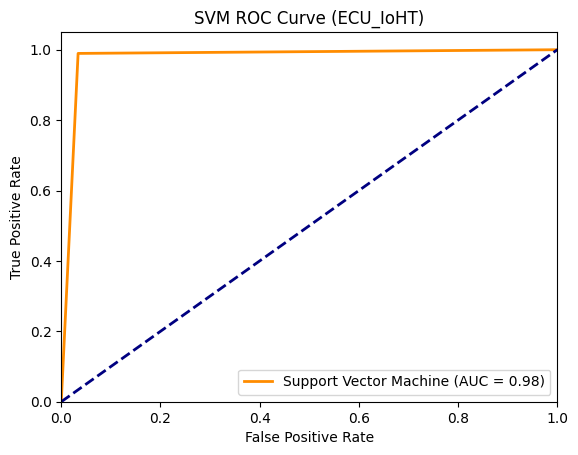

In [34]:
# print ROC AUC Score for svm
roc_auc_svm = roc_auc_score(y_test, svm_pred)
print(f"\nROC AUC Score for SVM (ECU_IoHT): {roc_auc_svm}")

# Plot ROC Curve for svm
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_pred)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'Support Vector Machine (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve (ECU_IoHT)')
plt.legend(loc="lower right")
plt.show()


Support Vector Machine (ECU_IoHT):
 Accuracy: 0.9710008092797411
 Precision: 0.885758098524056
 Recall: 0.989507494646681
 F1 Score: 0.9347628198644685


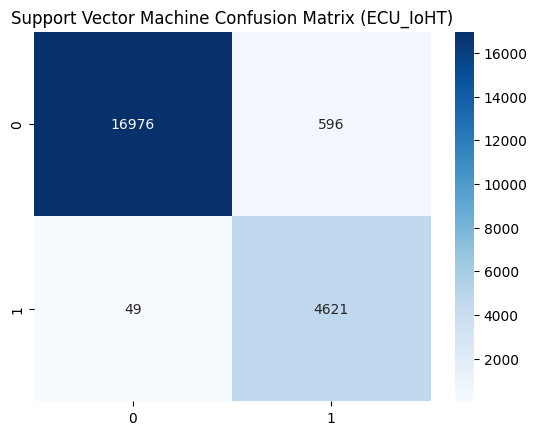

In [35]:
#print performance evaluation metrics and confusion matrix for svm
print(f'Support Vector Machine (ECU_IoHT):\n Accuracy: {accuracy_svm}\n Precision: {precision_svm}\n Recall: {recall_svm}\n F1 Score: {f1_svm}')
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix (ECU_IoHT)')
plt.show()

Artificial Neural Network Classifier

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay


# Split training data into train and validation sets
X_train_ann, X_val, y_train_ann, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Define the ANN model architecture
ann_model = Sequential()
ann_model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))  # First hidden layer
ann_model.add(Dropout(0.2))  # Optional dropout for regularization
ann_model.add(Dense(units=32, activation='relu'))  # Second hidden layer
ann_model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the ANN model with validation data
history_ann = ann_model.fit(X_train_ann, y_train_ann, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
2225/2225 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9221 - loss: 0.2079 - val_accuracy: 0.9540 - val_loss: 0.1049
Epoch 2/10
2225/2225 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9515 - loss: 0.1101 - val_accuracy: 0.9641 - val_loss: 0.0891
Epoch 3/10
2225/2225 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9580 - loss: 0.0974 - val_accuracy: 0.9700 - val_loss: 0.0832
Epoch 4/10
2225/2225 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9631 - loss: 0.0888 - val_accuracy: 0.9710 - val_loss: 0.0791
Epoch 5/10
2225/2225 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9642 - loss: 0.0863 - val_accuracy: 0.9633 - val_loss: 0.0789
Epoch 6/10
2225/2225 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9692 - loss: 0.0795 - val_accuracy: 0.9775 - val_loss: 0.0654
Epoch 7/10
2225/2225 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9715 - loss: 0.0756 - val_accuracy: 0.9777 - val_loss: 0.0648
Epoch 8/10
2225/2225 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9713 - loss: 0.0749 - 

In [38]:
# Make predictions on the test set
ann_pred = (ann_model.predict(X_test) > 0.5).astype("int32")


696/696 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [39]:
# Classification Report for ANN
print("Classification Report for ANN (ECU_IoHT):")
print(classification_report(y_test, ann_pred))

Classification Report for ANN (ECU_IoHT):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     17572
           1       0.91      0.98      0.94      4670

    accuracy                           0.98     22242
   macro avg       0.95      0.98      0.96     22242
weighted avg       0.98      0.98      0.98     22242



In [40]:
#declare performance evaluation metrics for ann
accuracy_ann = accuracy_score(y_test, ann_pred)
precision_ann = precision_score(y_test, ann_pred)
recall_ann = recall_score(y_test, ann_pred)
f1_ann = f1_score(y_test, ann_pred)
cm_ann = confusion_matrix(y_test, ann_pred)

Artificial Neural Network (ECU_IoHT):
 Accuracy: 0.9751820879417319
 Precision: 0.908531746031746
 Recall: 0.9805139186295503
 F1 Score: 0.9431513903192584


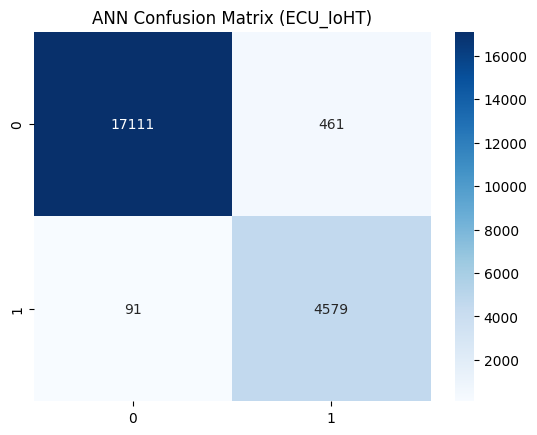

In [41]:
#print confusion matrix and performance evaluation metrics for ann
print(f'Artificial Neural Network (ECU_IoHT):\n Accuracy: {accuracy_ann}\n Precision: {precision_ann}\n Recall: {recall_ann}\n F1 Score: {f1_ann}')
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues')
plt.title('ANN Confusion Matrix (ECU_IoHT)')
plt.show()


ROC AUC Score for ANN (ECU_IoHT): 0.9771394997199653


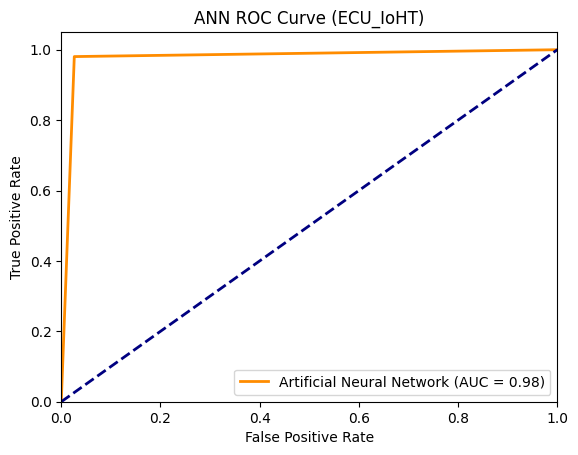

In [42]:
# print ROC AUC Score for ann
roc_auc_ann = roc_auc_score(y_test, ann_pred)
print(f"\nROC AUC Score for ANN (ECU_IoHT): {roc_auc_ann}")

# Plot ROC Curve for ann
fpr_ann, tpr_ann, _ = roc_curve(y_test, ann_pred)
plt.figure()
plt.plot(fpr_ann, tpr_ann, color='darkorange', lw=2, label=f'Artificial Neural Network (AUC = {roc_auc_ann:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN ROC Curve (ECU_IoHT)')
plt.legend(loc="lower right")
plt.show()


 Long Short Term Memory Classifier

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

X_train_reshaped = np.array(X_train).reshape(X_train.shape[0], 1, X_train.shape[1])
X_val_reshaped = np.array(X_val).reshape(X_val.shape[0], 1, X_val.shape[1])
X_test_reshaped = np.array(X_test).reshape(X_test.shape[0], 1, X_test.shape[1])



# Define the LSTM model architecture
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))) # Use the reshaped input shape
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1, activation='sigmoid'))  # Binary classification



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [44]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the lstm model
history_lstm = lstm_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))


Epoch 1/10
2781/2781 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9227 - loss: 0.2242 - val_accuracy: 0.9511 - val_loss: 0.1128
Epoch 2/10
2781/2781 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9466 - loss: 0.1172 - val_accuracy: 0.9522 - val_loss: 0.1019
Epoch 3/10
2781/2781 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9504 - loss: 0.1071 - val_accuracy: 0.9504 - val_loss: 0.0968
Epoch 4/10
2781/2781 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9530 - loss: 0.1022 - val_accuracy: 0.9580 - val_loss: 0.0902
Epoch 5/10
2781/2781 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9562 - loss: 0.0985 - val_accuracy: 0.9623 - val_loss: 0.0887
Epoch 6/10
2781/2781 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9621 - loss: 0.0915 - val_accuracy: 0.9692 - val_loss: 0.0805
Epoch 7/10
2781/2781 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.9664 - loss: 0.0854 - val_accuracy: 0.9707 - val_loss: 0.0750
Epoch 8/10
2781/2781 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9688 - loss: 0

In [45]:
# Make predictions with the model
lstm_pred = (lstm_model.predict(X_test_reshaped) > 0.5).astype("int32")


696/696 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [46]:
# Classification Report fpr lstm
print("Classification Report for LSTM (ECU_IoHT):")
print(classification_report(y_test, lstm_pred))


Classification Report for LSTM (ECU_IoHT):
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     17572
           1       0.90      0.97      0.94      4670

    accuracy                           0.97     22242
   macro avg       0.95      0.97      0.96     22242
weighted avg       0.97      0.97      0.97     22242



In [47]:
#declare performance evaluation metrics for lstm
accuracy_lstm = accuracy_score(y_test, lstm_pred)
precision_lstm = precision_score(y_test, lstm_pred)
recall_lstm = recall_score(y_test, lstm_pred)
f1_lstm = f1_score(y_test, lstm_pred)
cm_lstm = confusion_matrix(y_test, lstm_pred)

Long Short Term Memory (ECU_IoHT):
 Accuracy: 0.9727542487186404
 Precision: 0.903976143141153
 Recall: 0.9736616702355461
 F1 Score: 0.9375257731958764


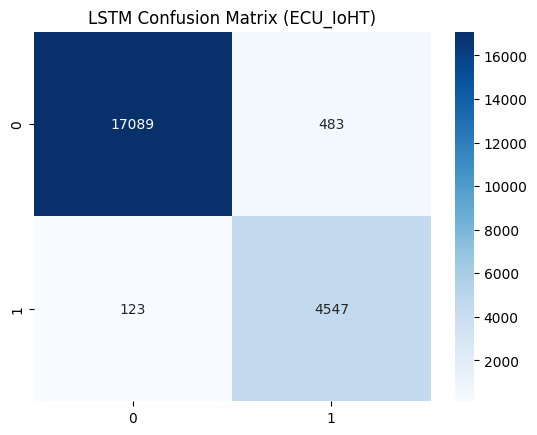

In [48]:
#print confusion matrix and performance evaluation metrics for lstm
print(f'Long Short Term Memory (ECU_IoHT):\n Accuracy: {accuracy_lstm}\n Precision: {precision_lstm}\n Recall: {recall_lstm}\n F1 Score: {f1_lstm}')
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues')
plt.title('LSTM Confusion Matrix (ECU_IoHT)')
plt.show()


ROC AUC Score for LSTM (ECU_IoHT): 0.9730873796203908


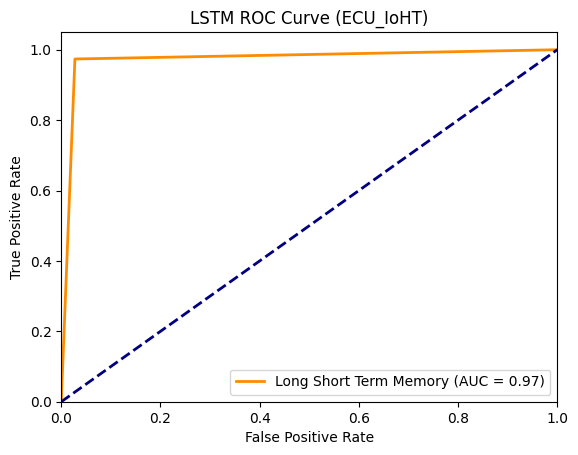

In [49]:
# print ROC AUC Score for lstm
roc_auc_lstm = roc_auc_score(y_test, lstm_pred)
print(f"\nROC AUC Score for LSTM (ECU_IoHT): {roc_auc_lstm}")

# Plot ROC Curve for lstm
fpr_lstm, tpr_lstm, _ = roc_curve(y_test, lstm_pred)
plt.figure()
plt.plot(fpr_lstm, tpr_lstm, color='darkorange', lw=2,label=f'Long Short Term Memory (AUC = {roc_auc_lstm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LSTM ROC Curve (ECU_IoHT)')
plt.legend(loc="lower right")
plt.show()


Ensemble Model CLassifier

In [50]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Define base learners for the ensemble model
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('xgb', xgb.XGBClassifier(eval_metric='logloss'))
]


# Define meta-learner for the ensemble model
meta_learner = SVC(probability=True)

# Create the stacking classifier
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5  # Cross-validation splitting strategy
)


#  Train the stacking classifier
stacking_clf.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=N...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=SVC(probability=True))

In [51]:
#  Make predictions with the ensemble model
ensemble_pred = stacking_clf.predict(X_test)


In [52]:
# Classification Report for the ensemble model
print("Classification Report (ECU_IoHT):")
print(classification_report(y_test, ensemble_pred))

Classification Report (ECU_IoHT):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17572
           1       0.99      0.99      0.99      4670

    accuracy                           1.00     22242
   macro avg       0.99      1.00      0.99     22242
weighted avg       1.00      1.00      1.00     22242



In [53]:
#declare performance evaluation metrics
accuracy_ensemble_model = accuracy_score(y_test, ensemble_pred)
precision_ensemble_model = precision_score(y_test, ensemble_pred)
recall_ensemble_model = recall_score(y_test, ensemble_pred)
f1_ensemble_model = f1_score(y_test, ensemble_pred)
cm_ensemble_model = confusion_matrix(y_test, ensemble_pred)


ROC AUC Score for Ensemble Model Classifier (ECU_IoHT): 0.9951526079791141


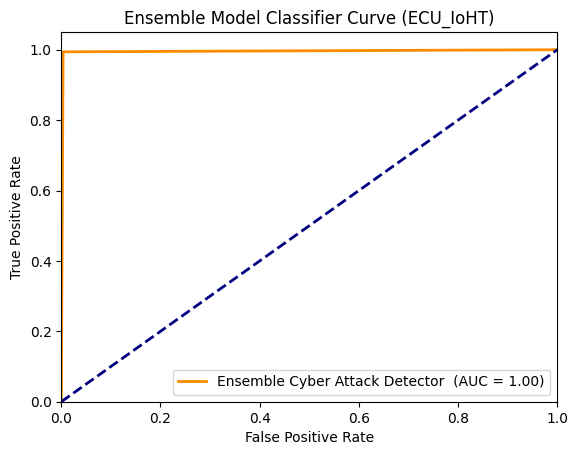

In [54]:
# print ROC AUC Score for the ensemble model
roc_auc_ensemble = roc_auc_score(y_test, ensemble_pred)
print(f"\nROC AUC Score for Ensemble Model Classifier (ECU_IoHT): {roc_auc_ensemble}")

# Plot ROC Curve for the ensemble model
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_pred)
plt.figure()
plt.plot(fpr_ensemble, tpr_ensemble, color='darkorange', lw=2, label=f'Ensemble Cyber Attack Detector  (AUC = {roc_auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Ensemble Model Classifier Curve (ECU_IoHT)')
plt.legend(loc="lower right")
plt.show()


Ensemble_model (ECU_IoHT):
 Accuracy: 0.9958187213380092
 Precision: 0.9861907796898237
 Recall: 0.9940042826552462
 F1 Score: 0.9900821158152927


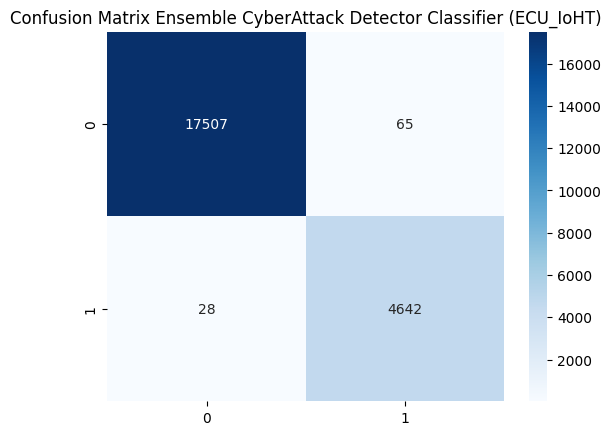

In [55]:
#print confusionmatrix and performance evaluation metrics for the ensemble model
print(f'Ensemble_model (ECU_IoHT):\n Accuracy: {accuracy_ensemble_model}\n Precision: {precision_ensemble_model}\n Recall: {recall_ensemble_model}\n F1 Score: {f1_ensemble_model}')
sns.heatmap(cm_ensemble_model, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Ensemble CyberAttack Detector Classifier (ECU_IoHT)')
plt.show()

ROC Curve Comparison

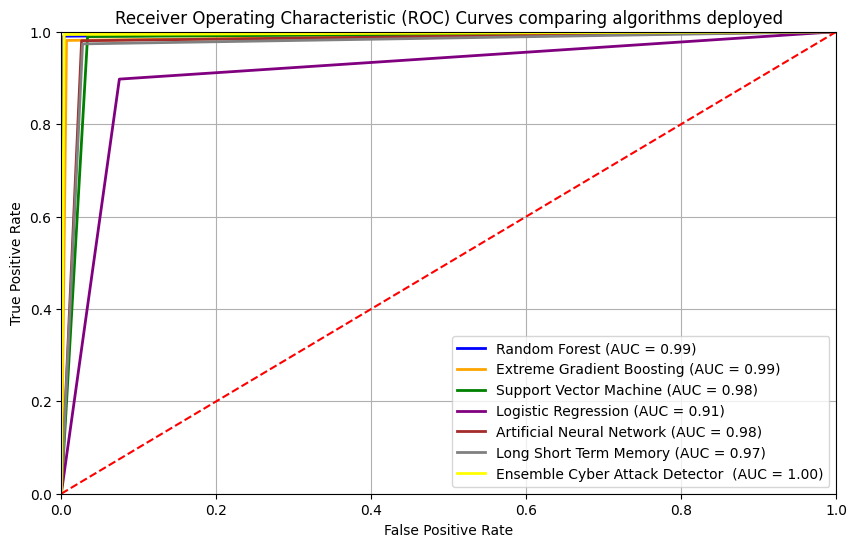

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

#  Plot ROC curves for all the models deployed
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='orange', lw=2, label=f'Extreme Gradient Boosting (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'Support Vector Machine (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_lr, tpr_lr, color='purple', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_ann, tpr_ann, color='brown', lw=2, label=f'Artificial Neural Network (AUC = {roc_auc_ann:.2f})')
plt.plot(fpr_lstm, tpr_lstm, color='grey', lw=2, label=f'Long Short Term Memory (AUC = {roc_auc_lstm:.2f})')
plt.plot(fpr_ensemble, tpr_ensemble, color='yellow', lw=2, label=f'Ensemble Cyber Attack Detector  (AUC = {roc_auc_ensemble:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves comparing algorithms deployed')
plt.legend(loc='lower right')
plt.grid()
plt.show()